In [22]:
import math
import pandas_datareader as web
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import yfinance as yf

plt.style.use('fivethirtyeight')

In [20]:

# Pulled data from Yahoo Finance
df = yf.download('^DJI',start = '2008-01-01', end = '2022-12-31')

print('Number of rows and columns: ', df.shape)
print(df.head())
print("checking if any null values are present\n", df.isna().sum())

[*********************100%***********************]  1 of 1 completed
Number of rows and columns:  (3777, 6)
                    Open          High           Low         Close  \
Date                                                                 
2008-01-02  13261.820312  13279.540039  12991.370117  13043.959961   
2008-01-03  13044.120117  13137.929688  13023.559570  13056.719727   
2008-01-04  13046.559570  13046.719727  12789.040039  12800.179688   
2008-01-07  12801.150391  12884.150391  12733.839844  12827.490234   
2008-01-08  12820.900391  12906.419922  12565.410156  12589.070312   

               Adj Close     Volume  
Date                                 
2008-01-02  13043.959961  239580000  
2008-01-03  13056.719727  200620000  
2008-01-04  12800.179688  304210000  
2008-01-07  12827.490234  306700000  
2008-01-08  12589.070312  322690000  
checking if any null values are present
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtyp

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3777 entries, 2008-01-02 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3777 non-null   float64
 1   High       3777 non-null   float64
 2   Low        3777 non-null   float64
 3   Close      3777 non-null   float64
 4   Adj Close  3777 non-null   float64
 5   Volume     3777 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 206.6 KB


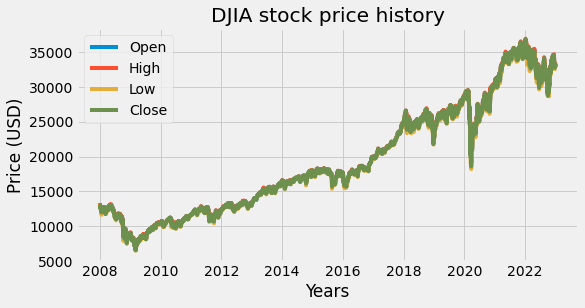

In [25]:
plt.figure(figsize = (8,4))
plt.plot(df["Open"])
plt.plot(df["High"])
plt.plot(df["Low"])
plt.plot(df["Close"])
plt.title('DJIA stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Years')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

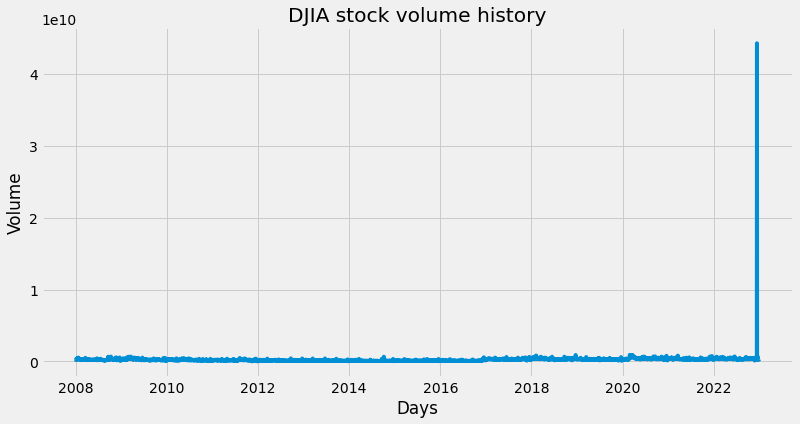

In [19]:
plt.figure(figsize = (12,6))
plt.plot(df["Volume"])
plt.title('DJIA stock volume history')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

In [5]:
# Create a dataframe with only the Close Stock Price Column
data_target = df.filter(['Close'])

# Convert the dataframe to a numpy array to train the LSTM model
target = data_target.values

# Splitting the dataset into training and test
# Target Variable: Close stock price value

training_data_len = math.ceil(len(target)* 0.75) # training set has 75% of the data
training_data_len

# Normalizing data before model fitting using MinMaxScaler
# Feature Scaling

sc = MinMaxScaler(feature_range=(0,1))
training_scaled_data = sc.fit_transform(target)
training_scaled_data

array([[0.21475544],
       [0.21517722],
       [0.20669728],
       ...,
       [0.8702942 ],
       [0.88170115],
       [0.87926993]])

In [6]:
train_data = training_scaled_data[0:training_data_len  , : ]

X_train = []
y_train = []
for i in range(180, len(train_data)):
    X_train.append(train_data[i-180:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train) # converting into numpy sequences to train the LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print('Number of rows and columns: ', X_train.shape)  #(854 values, 180 time-steps, 1 output)

Number of rows and columns:  (2653, 180, 1)


In [7]:
!pip install -U protobuf==3.8.0

In [8]:
# We add the LSTM layer and later add a few Dropout layers to prevent overfitting.
# Building a LTSM model with 50 neurons and 4 hidden layers. We add the LSTM layer with the following arguments:
# 50 units which is the dimensionality of the output space
# return_sequences=True which determines whether to return the last output in the output sequence, or the full sequence input_shape as the shape of our training set.
# When defining the Dropout layers, we specify 0.2, meaning that 20% of the layers will be dropped.
# Thereafter, we add the Dense layer that specifies the output of 1 unit.
# After this, we compile our model using the popular adam optimizer and set the loss as the mean_squarred_error.

model = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
83/83 [==============================] - 23s 176ms/step - loss: 0.0070
Epoch 2/100
83/83 [==============================] - 15s 176ms/step - loss: 0.0014
Epoch 3/100
83/83 [==============================] - 15s 183ms/step - loss: 0.0012
Epoch 4/100
83/83 [==============================] - 15s 179ms/step - loss: 0.0013
Epoch 5/100
83/83 [==============================] - 15s 186ms/step - loss: 0.0011
Epoch 6/100
83/83 [==============================] - 19s 229ms/step - loss: 0.0010
Epoch 7/100
83/83 [==============================] - 20s 238ms/step - loss: 9.0932e-04
Epoch 8/100
83/83 [==============================] - 17s 208ms/step - loss: 9.4754e-04
Epoch 9/100
83/83 [==============================] - 19s 226ms/step - loss: 0.0011
Epoch 10/100
83/83 [==============================] - 19s 235ms/step - loss: 9.0196e-04
Epoch 11/100
83/83 [==============================] - 20s 246ms/step - loss: 8.3881e-04
Epoch 12/100
83/83 [==============================] - 20s 242ms/step 

In [9]:
# Getting the predicted stock price
test_data = training_scaled_data[training_data_len - 180: , : ]

#Create the x_test and y_test data sets
X_test = []
y_test =  target[training_data_len : , : ]
for i in range(180,len(test_data)):
    X_test.append(test_data[i-180:i,0])

# Convert x_test to a numpy array
X_test = np.array(X_test)

#Reshape the data into the shape accepted by the LSTM
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
print('Number of rows and columns: ', X_test.shape)

Number of rows and columns:  (944, 180, 1)


In [10]:
# Making predictions using the test dataset
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

30/30 [==============================] - 13s 155ms/step


C:\Users\sukhi\AppData\Local\Temp/ipykernel_29292/1054658080.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predicted_stock_price


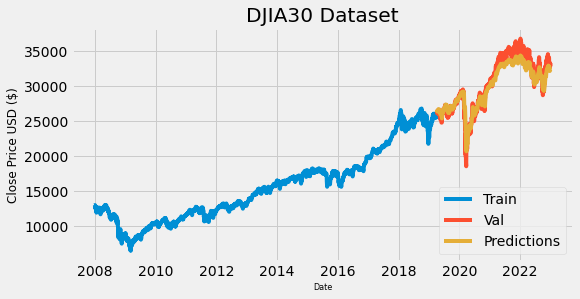

In [26]:
# Visualising the results
train = data_target[:training_data_len]
valid = data_target[training_data_len:]
valid['Predictions'] = predicted_stock_price
plt.figure(figsize=(8,4))
plt.title('DJIA30 Dataset')
plt.xlabel('Date', fontsize=8)
plt.ylabel('Close Price USD ($)', fontsize=12)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [12]:
valid

,Close,Predictions
Date,,
2019-04-04,26384.630859,26337.357422
2019-04-05,26424.990234,26420.535156
2019-04-08,26341.019531,26483.714844
2019-04-09,26150.580078,26514.015625
2019-04-10,26157.160156,26491.734375
...,...,...
2022-12-23,33203.929688,32214.951172
2022-12-27,33241.558594,32285.666016
2022-12-28,32875.710938,32354.507812


In [13]:
nsamples, nx, ny = X_test.shape
d2_train_dataset = X_test.reshape((nsamples,nx*ny))

In [14]:
rmse = np.sqrt(np.mean(predicted_stock_price - y_test)**2)  
rmse
     

505.6039914923199

In [15]:
import numpy as np

def mape(y_test, predicted_stock_price):
    y_test, predicted_stock_price = np.array(y_test), np.array(predicted_stock_price)
    mape = np.mean(np.abs((y_test - predicted_stock_price) / y_test))
    return mape

In [16]:
 mape = np.mean(np.abs((y_test - predicted_stock_price) / y_test))*100

In [17]:
 mape

2.5128567201374397